# T2M (2-meter Temperature) GRIB2 File - Exploratory Data Analysis

This notebook is designed to explore and understand the structure of GRIB2 files containing 2-meter temperature data from ICON-D2 model for Germany.

**Goal**: Unfold and understand every aspect of the GRIB2 file in a structured way, similar to how we would explore a pandas DataFrame.

**File to analyze**: `../data/icon-d2_germany_regular-lat-lon_single-level_2025110700_000_2d_t_2m.grib2`

We'll proceed step-by-step to:
1. Load the file
2. Inspect how many parameters are present
3. Understand each parameter in detail
4. Explore relationships between parameters
5. Visualize the data structure and content

## 1. Import Required Libraries

Let's start by importing the necessary libraries:
- **xarray**: For working with multi-dimensional labeled arrays (think of it as pandas for N-dimensional data)
- **cfgrib**: Backend engine for xarray to read GRIB files
- **pandas**: For familiar tabular data operations when we convert data
- **numpy**: For numerical operations
- **matplotlib**: For visualization

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the GRIB2 File

We'll load the GRIB2 file using xarray with the cfgrib engine. This will give us a Dataset object, which is similar to having multiple related DataFrames with shared indices.

In [2]:
import bz2

# Load the GRIB2 file
file_path = '../data/icon-d2_germany_regular-lat-lon_single-level_2025110700_000_2d_t_2m.grib2.bz2'
decompressed_path = '../data/icon-d2_germany_regular-lat-lon_single-level_2025110700_000_2d_t_2m.grib2'  # Temporary decompressed file

# Decompress the file
with bz2.open(file_path, 'rb') as f_in, open(decompressed_path, 'wb') as f_out:
    f_out.write(f_in.read())

# Open the decompressed file using xarray
ds = xr.open_dataset(decompressed_path, engine='cfgrib')

print(f"File loaded successfully!")
print(f"Dataset type: {type(ds)}")


Ignoring index file '../data/icon-d2_germany_regular-lat-lon_single-level_2025110700_000_2d_t_2m.grib2.5b7b6.idx' older than GRIB file


File loaded successfully!
Dataset type: <class 'xarray.core.dataset.Dataset'>


## 3. First Look at the Dataset

Let's take our first look at what's inside the dataset. Think of this as similar to running `df.info()` or `df.head()` in pandas.

In [3]:
ds

<xarray.Dataset> Size: 4MB
Dimensions:            (latitude: 746, longitude: 1215)
Coordinates:
  * latitude           (latitude) float64 6kB 43.18 43.2 43.22 ... 58.06 58.08
  * longitude          (longitude) float64 10kB -3.94 -3.92 -3.9 ... 20.32 20.34
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B ...
    heightAboveGround  float64 8B ...
    valid_time         datetime64[ns] 8B ...
Data variables:
    t2m                (latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2025-11-07T07:57 GRIB to CDM+CF via cfgrib-0.9.1...

## 5. Convert Dataset to Pandas DataFrames

Now let's convert the xarray Dataset into pandas DataFrames. This will make it easier for you to analyze each parameter using familiar pandas operations.

In xarray, each parameter (data variable) can be converted to a DataFrame, where:
- **Index**: Will be the coordinate dimensions (latitude, longitude, time, etc.)
- **Columns**: Will include the parameter values and coordinate values
- **Shape**: Will be flattened from the multi-dimensional array

In [4]:
# Convert the entire dataset to a pandas DataFrame
# This will create a multi-index DataFrame with all parameters
df_full = ds.to_dataframe()

print("Full dataset converted to DataFrame:")
print(f"Shape: {df_full.shape}")
print(f"Columns: {list(df_full.columns)}")
print(f"Index levels: {df_full.index.names}")
print("\nFirst few rows:")
df_full.info()

Full dataset converted to DataFrame:
Shape: (906390, 5)
Columns: ['time', 'step', 'heightAboveGround', 'valid_time', 't2m']
Index levels: ['latitude', 'longitude']

First few rows:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 906390 entries, (np.float64(43.18), np.float64(-3.9399999999999977)) to (np.float64(58.08), np.float64(20.34))
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   time               906390 non-null  datetime64[ns] 
 1   step               906390 non-null  timedelta64[ns]
 2   heightAboveGround  906390 non-null  float64        
 3   valid_time         906390 non-null  datetime64[ns] 
 4   t2m                754862 non-null  float32        
dtypes: datetime64[ns](2), float32(1), float64(1), timedelta64[ns](1)
memory usage: 34.6 MB


In [5]:
df_full.loc[df_full["t2m"].notnull()]

time   step  heightAboveGround valid_time         t2m
latitude longitude                                                            
43.18    -0.32     2025-11-07 0 days                2.0 2025-11-07  285.226257
         -0.30     2025-11-07 0 days                2.0 2025-11-07  285.274109
         -0.28     2025-11-07 0 days                2.0 2025-11-07  285.274109
         -0.26     2025-11-07 0 days                2.0 2025-11-07  285.354187
         -0.24     2025-11-07 0 days                2.0 2025-11-07  285.531921
...                       ...    ...                ...        ...         ...
58.08     11.60    2025-11-07 0 days                2.0 2025-11-07  283.499695
          11.62    2025-11-07 0 days                2.0 2025-11-07  283.124695
          11.64    2025-11-07 0 days                2.0 2025-11-07  283.124695
          11.66    2025-11-07 0 days                2.0 2025-11-07  283.077332
          12.28    2025-11-07 0 days                2.0 2025-11-07  281.685242

[754862 rows x 5 columns]

## 6. Analyze Each Parameter Individually

Let's create separate DataFrames for each parameter and examine them one by one. This will help us understand what each parameter represents.

In [6]:
# Create individual DataFrames for each parameter
parameter_dfs = {}

for var_name in ds.data_vars:
    # Convert each data variable to DataFrame
    param_df = ds[var_name].to_dataframe()
    parameter_dfs[var_name] = param_df

    print(f"\n=== Parameter: {var_name} ===")
    print(f"Shape: {param_df.shape}")
    print(f"Data type: {param_df[var_name].dtype}")
    print(f"Has NaN values: {param_df[var_name].isna().any()}")
    print(f"Value range: {param_df[var_name].min():.4f} to {param_df[var_name].max():.4f}")

    # Show first few rows
    print("First 5 rows:")
    print(param_df.head())
    print("-" * 50)


=== Parameter: t2m ===
Shape: (906390, 5)
Data type: float32
Has NaN values: True
Value range: 264.4841 to 290.8801
First 5 rows:
                         time   step  heightAboveGround valid_time  t2m
latitude longitude                                                     
43.18    -3.94     2025-11-07 0 days                2.0 2025-11-07  NaN
         -3.92     2025-11-07 0 days                2.0 2025-11-07  NaN
         -3.90     2025-11-07 0 days                2.0 2025-11-07  NaN
         -3.88     2025-11-07 0 days                2.0 2025-11-07  NaN
         -3.86     2025-11-07 0 days                2.0 2025-11-07  NaN
--------------------------------------------------


## 7. Examine Parameter Metadata

Let's look at the detailed metadata for each parameter to understand what they represent, their units, and other important attributes.

In [7]:
# Examine metadata for each parameter
for var_name in ds.data_vars:
    var = ds[var_name]
    print(f"\n=== Metadata for: {var_name} ===")

    # Basic attributes
    print(f"Dimensions: {var.dims}")
    print(f"Shape: {var.shape}")
    print(f"Data type: {var.dtype}")

    # GRIB-specific attributes
    attrs = var.attrs
    if attrs:
        print("Attributes:")
        for key, value in attrs.items():
            print(f"  {key}: {value}")
    else:
        print("No attributes found")

    print("-" * 50)


=== Metadata for: t2m ===
Dimensions: ('latitude', 'longitude')
Shape: (746, 1215)
Data type: float32
Attributes:
  GRIB_paramId: 167
  GRIB_dataType: fc
  GRIB_numberOfPoints: 906390
  GRIB_typeOfLevel: heightAboveGround
  GRIB_stepUnits: 1
  GRIB_stepType: instant
  GRIB_gridType: regular_ll
  GRIB_uvRelativeToGrid: 0
  GRIB_NV: 0
  GRIB_Nx: 1215
  GRIB_Ny: 746
  GRIB_cfName: air_temperature
  GRIB_cfVarName: t2m
  GRIB_gridDefinitionDescription: Latitude/longitude
  GRIB_iDirectionIncrementInDegrees: 0.02
  GRIB_iScansNegatively: 0
  GRIB_jDirectionIncrementInDegrees: 0.02
  GRIB_jPointsAreConsecutive: 0
  GRIB_jScansPositively: 1
  GRIB_latitudeOfFirstGridPointInDegrees: 43.18
  GRIB_latitudeOfLastGridPointInDegrees: 58.08
  GRIB_longitudeOfFirstGridPointInDegrees: 356.06
  GRIB_longitudeOfLastGridPointInDegrees: 20.34
  GRIB_missingValue: 3.4028234663852886e+38
  GRIB_name: 2 metre temperature
  GRIB_shortName: 2t
  GRIB_units: K
  long_name: 2 metre temperature
  units: K
  stan

## 8. Explore Coordinate Systems

Let's examine the coordinate variables (latitude, longitude, time, etc.) that define the spatial and temporal structure of our data.

In [8]:
# Examine coordinate variables
print("Coordinate Variables:")
print("=" * 50)

for coord_name in ds.coords:
    coord = ds.coords[coord_name]
    print(f"\n=== Coordinate: {coord_name} ===")
    print(f"Dimensions: {coord.dims}")
    print(f"Shape: {coord.shape}")
    print(f"Data type: {coord.dtype}")
    print(f"Range: {coord.min().values} to {coord.max().values}")

    # Show first few values
    print(f"First 5 values: {coord.values}")

    # Attributes
    if coord.attrs:
        print("Attributes:")
        for key, value in coord.attrs.items():
            print(f"  {key}: {value}")

print("\n" + "=" * 50)
print("Dataset dimensions summary:")
for dim_name, size in ds.dims.items():
    print(f"  {dim_name}: {size}")

Coordinate Variables:

=== Coordinate: time ===
Dimensions: ()
Shape: ()
Data type: datetime64[ns]
Range: 2025-11-07T00:00:00.000000000 to 2025-11-07T00:00:00.000000000
First 5 values: 2025-11-07T00:00:00.000000000
Attributes:
  long_name: initial time of forecast
  standard_name: forecast_reference_time

=== Coordinate: step ===
Dimensions: ()
Shape: ()
Data type: timedelta64[ns]
Range: 0 nanoseconds to 0 nanoseconds
First 5 values: 0 nanoseconds
Attributes:
  long_name: time since forecast_reference_time
  standard_name: forecast_period

=== Coordinate: heightAboveGround ===
Dimensions: ()
Shape: ()
Data type: float64
Range: 2.0 to 2.0
First 5 values: 2.0
Attributes:
  long_name: height above the surface
  units: m
  positive: up
  standard_name: height

=== Coordinate: latitude ===
Dimensions: ('latitude',)
Shape: (746,)
Data type: float64
Range: 43.18 to 58.08
First 5 values: [43.18 43.2  43.22 43.24 43.26 43.28 43.3  43.32 43.34 43.36 43.38 43.4
 43.42 43.44 43.46 43.48 43.5  43.5

/var/folders/hc/rzlv06qx15g3jld2q3gy9qbw1l3ygc/T/ipykernel_33752/2769944090.py:24: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for dim_name, size in ds.dims.items():
<frozen _collections_abc>:894: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


## 9. Basic Statistical Analysis

Let's perform some basic statistical analysis on each parameter to understand their distributions and characteristics.

In [9]:
# Statistical summary for each parameter
for var_name in ds.data_vars:
    param_data = ds[var_name]
    print(f"\n=== Statistics for: {var_name} ===")

    # Basic statistics
    print(f"Mean: {param_data.mean().values:.4f}")
    print(f"Std: {param_data.std().values:.4f}")
    print(f"Min: {param_data.min().values:.4f}")
    print(f"Max: {param_data.max().values:.4f}")
    print(f"Median: {param_data.median().values:.4f}")

    # Quantiles
    print("Quantiles:")
    for q in [0.25, 0.5, 0.75]:
        print(f"  {q*100:.0f}%: {param_data.quantile(q).values:.4f}")

    print("-" * 30)


=== Statistics for: t2m ===
Mean: 281.4864
Std: 3.9423
Min: 264.4841
Max: 290.8801
Median: 281.7009
Quantiles:
  25%: 278.3268
  50%: 281.7009
  75%: 284.9445
------------------------------


## 12. Spatial Visualization - Plotting Coordinates on Map

Let's start simple: plot all the latitude and longitude coordinate pairs on a map to visualize the spatial coverage of your GRIB2 data.

In [10]:
# Set up the plotting environment
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Get coordinate information
lats = ds.latitude.values
lons = ds.longitude.values

print(f"Latitude range: {lats.min():.2f}° to {lats.max():.2f}°")
print(f"Longitude range: {lons.min():.2f}° to {lons.max():.2f}°")
print(f"Grid resolution: {len(lats)} x {len(lons)} points")
print(f"Total grid points: {len(lats) * len(lons)}")

# Create meshgrid of all coordinate points
lon_mesh, lat_mesh = np.meshgrid(lons, lats)

print(f"Meshgrid shape: {lon_mesh.shape}")
print("Ready to plot coordinates!")

Latitude range: 43.18° to 58.08°
Longitude range: -3.94° to 20.34°
Grid resolution: 746 x 1215 points
Total grid points: 906390
Meshgrid shape: (746, 1215)
Ready to plot coordinates!


### Simple Coordinate Plot

Let's plot all the latitude and longitude coordinate pairs as points on a map.

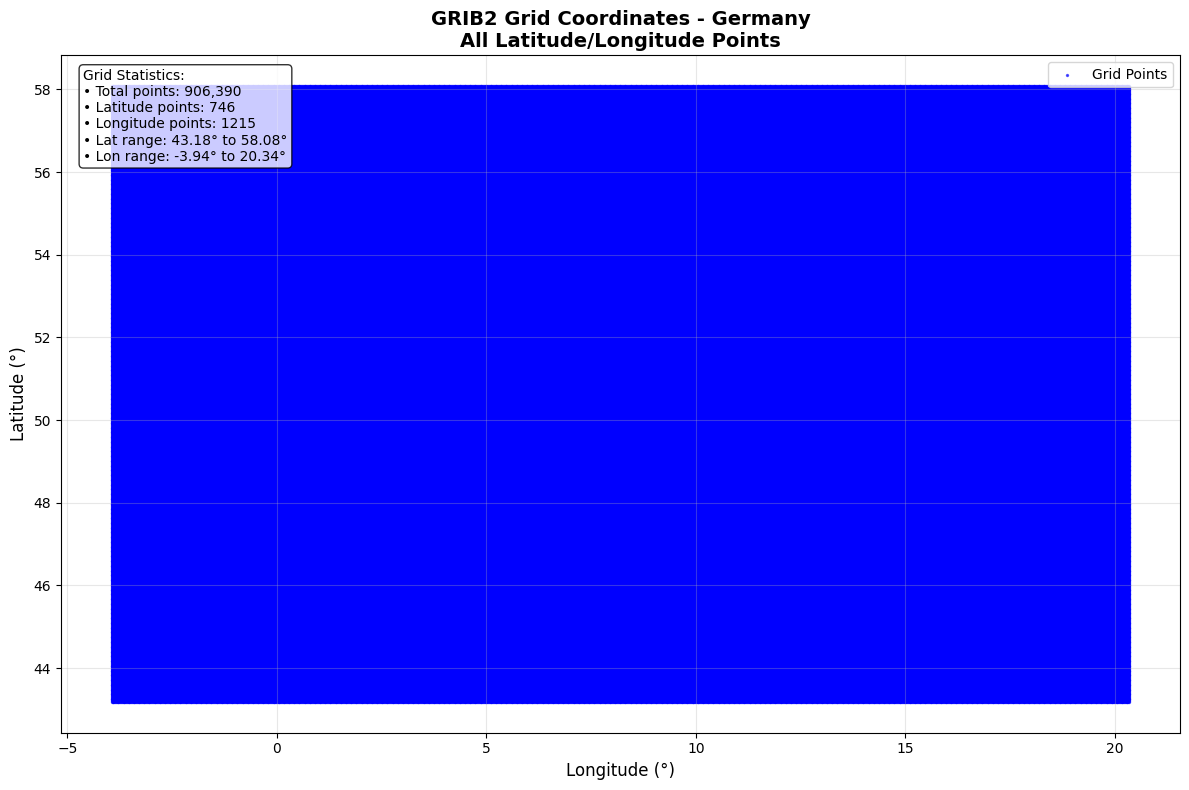

✅ Successfully plotted all coordinate points!
Each blue dot represents one latitude/longitude measurement location.
This shows the complete spatial coverage of your GRIB2 data.


In [11]:
# Simple scatter plot of all coordinate points
plt.figure(figsize=(12, 8))

plt.scatter(lon_mesh, lat_mesh, c='blue', s=2, alpha=0.6, label='Grid Points')

# Set labels and title
plt.xlabel('Longitude (°)', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)
plt.title('GRIB2 Grid Coordinates - Germany\nAll Latitude/Longitude Points', fontsize=14, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)

# Add some reference information
stats_text = f'''Grid Statistics:
• Total points: {len(lats) * len(lons):,}
• Latitude points: {len(lats)}
• Longitude points: {len(lons)}
• Lat range: {lats.min():.2f}° to {lats.max():.2f}°
• Lon range: {lons.min():.2f}° to {lons.max():.2f}°'''

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         verticalalignment='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print("✅ Successfully plotted all coordinate points!")
print(f"Each blue dot represents one latitude/longitude measurement location.")
print(f"This shows the complete spatial coverage of your GRIB2 data.")

### Understanding the Grid

Let's examine what this coordinate plot tells us about your data:

1. **Spatial Coverage**: The blue dots show where measurements exist
2. **Grid Structure**: Notice the regular pattern - this is a structured grid
3. **Resolution**: The density of points shows the spatial resolution
4. **Geographical Area**: The extent covers Germany and surrounding areas

**Key Observations:**
- The points form a regular rectangular grid
- Each intersection of latitude and longitude lines has a data point
- The grid covers the entire domain without gaps
- This is typical for numerical weather prediction models

In [12]:
# Examine the coordinate values more closely
print("\nFirst 10 latitude values:")
print(lats[:10])

print("\nFirst 10 longitude values:")
print(lons[:10])

print(f"\nLatitude spacing: {np.diff(lats[:5]).mean():.4f}°")
print(f"Longitude spacing: {np.diff(lons[:5]).mean():.4f}°")

print("\nThis shows:")
print("- Latitude decreases from north to south (typical for meteorological data)")
print("- Longitude increases from west to east")
print("- Regular spacing indicates a structured grid")


First 10 latitude values:
[43.18 43.2  43.22 43.24 43.26 43.28 43.3  43.32 43.34 43.36]

First 10 longitude values:
[-3.94 -3.92 -3.9  -3.88 -3.86 -3.84 -3.82 -3.8  -3.78 -3.76]

Latitude spacing: 0.0200°
Longitude spacing: 0.0200°

This shows:
- Latitude decreases from north to south (typical for meteorological data)
- Longitude increases from west to east
- Regular spacing indicates a structured grid


## 13. Plot Coordinates on Geographical Map

Now let's plot the coordinates on an actual geographical map with proper map features like coastlines, country borders, and geographical context.

✅ Cartopy is available - creating geographical map!


✅ Cartopy is available - creating geographical map!


/Users/hp8429/projects/electricity-feed-analysis/.venv/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip

/Users/hp8429/projects/electricity-feed-analysis/.venv/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip

/Users/hp8429/projects/electricity-feed-analysis/.venv/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip

/Users/hp8429/projects/electricity-feed-analysis/.venv/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip

/Users/hp8429/projects/electricity-feed-analysis/.venv/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https:

✅ Cartopy is available - creating geographical map!


/Users/hp8429/projects/electricity-feed-analysis/.venv/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip

/Users/hp8429/projects/electricity-feed-analysis/.venv/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip

/Users/hp8429/projects/electricity-feed-analysis/.venv/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip

/Users/hp8429/projects/electricity-feed-analysis/.venv/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip

/Users/hp8429/projects/electricity-feed-analysis/.venv/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning:

Downloading: https:

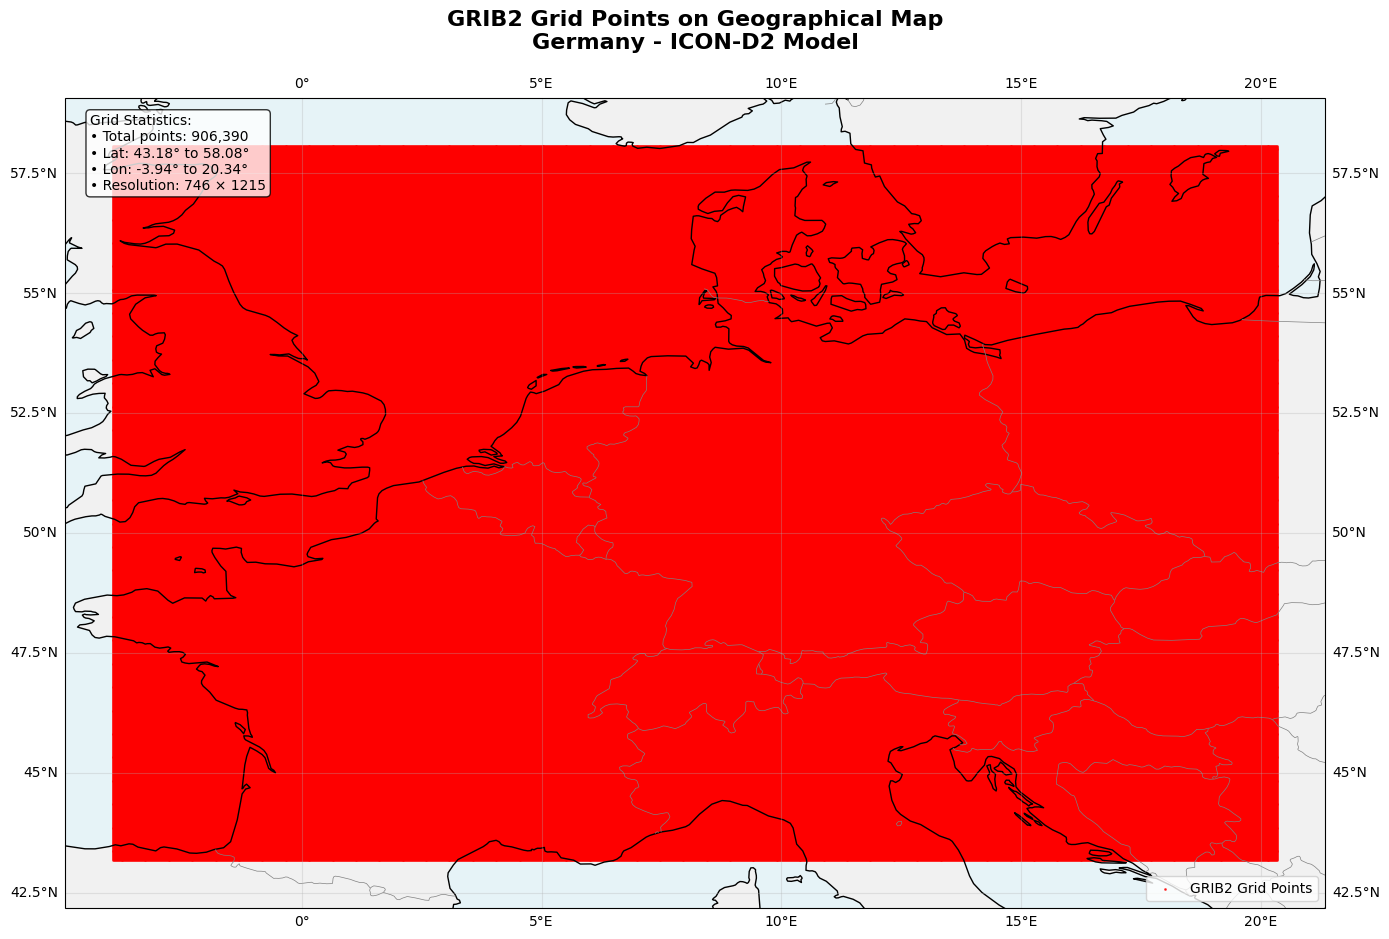

✅ Successfully created geographical map with Cartopy!


In [15]:
# Try to use Cartopy for proper geographical maps
try:
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    print("✅ Cartopy is available - creating geographical map!")

    # Create figure with PlateCarree projection (appropriate for lat/lon data)
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Add geographical features
    ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)

    # Plot the coordinate points
    ax.scatter(lon_mesh, lat_mesh, c='red', s=1, alpha=0.7,
               transform=ccrs.PlateCarree(), label='GRIB2 Grid Points')

    # Set map extent to focus on Germany and surroundings
    ax.set_extent([lons.min()-1, lons.max()+1, lats.min()-1, lats.max()+1],
                  crs=ccrs.PlateCarree())

    # Add gridlines
    ax.gridlines(draw_labels=True, alpha=0.3)

    # Add title and labels
    ax.set_title('GRIB2 Grid Points on Geographical Map\nGermany - ICON-D2 Model',
                 fontsize=16, fontweight='bold', pad=20)

    # Add statistics text
    stats_text = f'''Grid Statistics:
• Total points: {len(lats) * len(lons):,}
• Lat: {lats.min():.2f}° to {lats.max():.2f}°
• Lon: {lons.min():.2f}° to {lons.max():.2f}°
• Resolution: {len(lats)} × {len(lons)}'''

    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            verticalalignment='top', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    print("✅ Successfully created geographical map with Cartopy!")

except ImportError:
    print("⚠️  Cartopy not available. Let's install it first...")
    print("Run this command in your terminal:")
    print("pip install cartopy")
    print()
    print("Or if using conda:")
    print("conda install -c conda-forge cartopy")
    print()
    print("After installation, re-run this cell for a proper geographical map.")
    print()
    print("For now, let's create a simple map-like visualization...")

    # Fallback: Create a map-like visualization without Cartopy
    plt.figure(figsize=(12, 10))

    # Create a simple map-like background
    plt.fill_between([lons.min(), lons.max()], [lats.min(), lats.min()], [lats.max(), lats.max()],
                    color='lightblue', alpha=0.3, label='Ocean')
    plt.fill_between([lons.min(), lons.max()], [lats.min(), lats.max()], [lats.max(), lats.max()],
                    color='lightgray', alpha=0.3, where=(lons >= lons.min()) & (lons <= lons.max()),
                    label='Land')

    # Plot grid points
    plt.scatter(lon_mesh, lat_mesh, c='red', s=2, alpha=0.8, label='GRIB2 Grid Points')

    # Add some major cities for reference
    cities = {
        'Berlin': (13.4, 52.5),
        'Munich': (11.6, 48.1),
        'Hamburg': (10.0, 53.5),
        'Cologne': (6.96, 50.94),
        'Frankfurt': (8.68, 50.11)
    }

    for city, (lon, lat) in cities.items():
        plt.scatter(lon, lat, c='blue', s=50, marker='*', edgecolors='black', linewidth=1)
        plt.annotate(city, (lon, lat), xytext=(5, 5), textcoords='offset points',
                    fontsize=9, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

    plt.xlabel('Longitude (°)', fontsize=12)
    plt.ylabel('Latitude (°)', fontsize=12)
    plt.title('GRIB2 Grid Points - Germany\n(Simple Map View)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper right')

    # Add statistics
    stats_text = f'''Grid Statistics:
• Total points: {len(lats) * len(lons):,}
• Lat: {lats.min():.2f}° to {lats.max():.2f}°
• Lon: {lons.min():.2f}° to {lons.max():.2f}°'''

    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    print("✅ Created simple map-like visualization!")
    print("💡 For better geographical maps, install Cartopy:")
    print("   pip install cartopy")

### Alternative: Interactive Map with Plotly

If you prefer an interactive map, here's how to create one with Plotly:

In [14]:
# Try to create an interactive map with Plotly
try:
    import plotly.express as px
    import plotly.graph_objects as go

    print("✅ Plotly available - creating interactive map!")

    # Flatten the meshgrid for plotting
    lons_flat = lon_mesh.flatten()
    lats_flat = lat_mesh.flatten()

    # For performance, subsample the data (plot every 10th point)
    subsample_factor = 10
    lons_sample = lons_flat[::subsample_factor]
    lats_sample = lats_flat[::subsample_factor]

    print(f"Plotting {len(lons_sample):,} points (subsampled from {len(lons_flat):,} total)")

    # Create interactive scatter plot on map
    fig = px.scatter_mapbox(
        lat=lats_sample,
        lon=lons_sample,
        zoom=6,
        center=dict(lat=lats.mean(), lon=lons.mean()),
        title="GRIB2 Grid Points - Germany (Interactive Map)",
        mapbox_style="open-street-map"
    )

    # Update marker appearance
    fig.update_traces(
        marker=dict(size=4, color='red', opacity=0.8),
        mode='markers'
    )

    # Add some statistics as annotations
    stats_text = f"Grid Points Shown: {len(lons_sample):,}<br>" + \
                f"Total Grid Points: {len(lats) * len(lons):,}<br>" + \
                f"Lat Range: {lats.min():.2f}° to {lats.max():.2f}°<br>" + \
                f"Lon Range: {lons.min():.2f}° to {lons.max():.2f}°<br>" + \
                f"Subsampling: Every {subsample_factor}th point"

    fig.add_annotation(
        text=stats_text,
        xref="paper", yref="paper",
        x=0.02, y=0.98,
        showarrow=False,
        bgcolor="white",
        bordercolor="black",
        borderwidth=1
    )

    # Try to show the figure
    try:
        fig.show()
        print("✅ Interactive map created successfully!")
        print("💡 You can zoom, pan, and explore the grid points interactively!")
    except Exception as e:
        print(f"⚠️  Could not display interactive map: {e}")
        print("This might be due to:")
        print("- Running in a non-interactive environment")
        print("- Network connectivity issues")
        print("- Large dataset size")
        print()
        print("Try running this in a Jupyter notebook or JupyterLab for best results.")

except ImportError:
    print("⚠️  Plotly not available for interactive maps.")
    print("To install: pip install plotly")
    print("Or with uv: uv add plotly")
    print("Then re-run this cell for an interactive map experience.")
except Exception as e:
    print(f"⚠️  Error creating Plotly map: {e}")
    print("Common solutions:")
    print("1. Check your internet connection for map tiles")
    print("2. Try a different mapbox_style (e.g., 'carto-positron')")
    print("3. Reduce the subsample_factor for fewer points")
    print("4. Use the matplotlib fallback instead")

✅ Plotly available - creating interactive map!
Plotting 90,639 points (subsampled from 906,390 total)


/var/folders/hc/rzlv06qx15g3jld2q3gy9qbw1l3ygc/T/ipykernel_33752/3903090563.py:20: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


✅ Plotly available - creating interactive map!
Plotting 90,639 points (subsampled from 906,390 total)


/var/folders/hc/rzlv06qx15g3jld2q3gy9qbw1l3ygc/T/ipykernel_33752/3903090563.py:20: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


✅ Interactive map created successfully!
💡 You can zoom, pan, and explore the grid points interactively!
